### Import Libraries and load the Dataset ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
csv = 'http://bit.ly/w-data'

In [4]:
df = pd.read_csv(csv)

In [48]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.isnull == True

True

## No Null Data, so we can proceed ##

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0, 0.5, 'Percentage obtained')

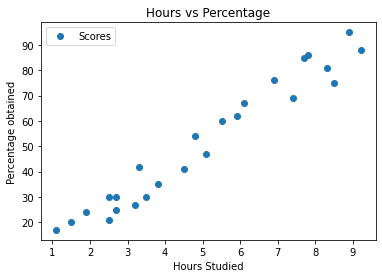

In [14]:
df.plot(x='Hours', y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage obtained')

## This "SCATTER PLOT" indicates positive linear relationship. Hours studies is linear to marks obtained ##

In [49]:
X = df.iloc[:,: -1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

### Splitting Data into training and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print("X train.shape = ", X_train.shape)
print("Y train.shape = ", y_train.shape)
print("X test.shape = ", X_test.shape)
print("Y test.shape = ", y_test.shape)

X train.shape =  (20, 1)
Y train.shape =  (20,)
X test.shape =  (5, 1)
Y test.shape =  (5,)


In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
print("β0 =",reg.intercept_,"\nβ1 =",reg.coef_)
# β0 is Intercept & Slope of the line is β1.,"

β0 = 2.018160041434683 
β1 = [9.91065648]


In [30]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

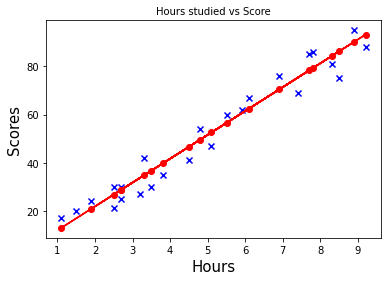

In [32]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(df.Hours,df.Scores,color='blue',marker='x')
plt.plot(X_train,reg.predict(X_train),color='red',marker='o')

In [33]:
pred_score = reg.predict(X_test)
pred_score

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [34]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Compare Actual and Predicted Scores

In [35]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_score})
compare

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 0, 'Hours Studied')

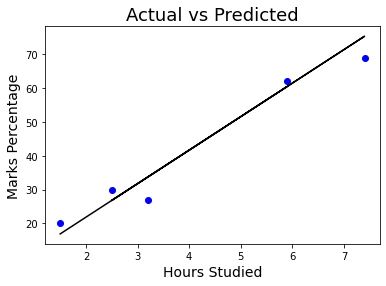

In [36]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_score, color='Black')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)

## Checking the accuracy of our Model

In [40]:
from sklearn import metrics
print('Accuracy of test_data and pred_score r-squared:', metrics.r2_score(y_test,pred_score))

Accuracy of test_data and pred_score r-squared: 0.9454906892105356


## We have an accuracy score of 93%

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
MSE =metrics.mean_squared_error(y_test, pred_score)
ROOT_E = np.sqrt(metrics.mean_squared_error(y_test, pred_score))
ABS_E = np.sqrt(metrics.mean_squared_error(y_test, pred_score))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",ROOT_E)
print("Mean Absolute Error     = ",ABS_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


In [47]:
hours = [9.25]
Answer = reg.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(Answer[0],3)))

Predicted Score for 9.25 hours/day = 93.692


## From our model, we can predict that if student studies for 9.25 hours then he can obtain approximately 93 hours.